In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [106]:

# Load dataset
data = pd.read_csv('/content/disney_plus_titles (1).csv')
df=pd.DataFrame(data)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


#Data cleaning


In [107]:
# Display the number of missing values for each column
print(data.isnull().sum())


show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64


In [133]:

# Remove rows with any missing values
data_cleaned = data.dropna()

# Remove rows with missing values in a specific column
data_cleaned = data.dropna(subset=['release_year'])


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",United States,2021-09-24,2021,TV-PG,88,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",2021-09-24,2011,G,93,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,2021-09-24,2014,PG-13,127,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,Unknown,Matt Beisner,United States,2021-09-22,2019,TV-PG,2,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,Unknown,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,2021-09-22,2021,TV-Y,1,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [109]:
# Fill missing values with a specific value
data_filled = data.fillna(0)

# Fill missing values with the mean of the columndata_filled = data.fillna(data.mean())

# Forward fill
data_filled = data.fillna(method='ffill')

# Backward fill
data_filled = data.fillna(method='bfill')

<ipython-input-109-0c0c11e361ca>:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

<ipython-input-109-0c0c11e361ca>:10: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [110]:
df.shape

(1368, 12)

In [111]:
# Fill missing values with the mean of the column for numeric columns only
numeric_cols = data.select_dtypes(include=np.number).columns
data_filled = data.copy() # Create a copy of the DataFrame to avoid modifying the original
data_filled["release_year"] = data_filled["release_year"].fillna(data_filled["release_year"].mean())


# Alternatively, to fill all columns regardless of type:
# First convert all columns to numeric, coercing errors to NaN:
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except:
        pass  # Skip columns that can't be converted

# Now you can use fillna with the mean:
data_filled = data.fillna(data.mean())

In [112]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [113]:
# Convert the 'date_added' column to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'])

In [114]:
# Fill missing values in 'director' and 'cast' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [115]:
# Fill missing values in 'country' with the mode (most frequent value)
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [116]:

# Remove rows with missing values in 'duration'
df.dropna(subset=['duration'], inplace=True)


In [117]:
# Convert the 'duration' column to numeric, handling errors
def convert_duration(duration):
    try:
        return int(duration.split()[0])  # Extract the numeric part of the string
    except (ValueError, AttributeError):
        return np.nan # Return NaN if not convertible to int

df['duration'] = df['duration'].apply(convert_duration)
df.dropna(subset=['duration'], inplace=True)

# Remove rows with duplicate show IDs
df.drop_duplicates(subset=['show_id'], inplace=True)

print("Data cleaning complete.")

Data cleaning complete.


In [118]:
# 1. Summary Statistics
print(df.describe())

                          date_added  release_year     duration
count                           1365   1368.000000  1368.000000
mean   2020-04-18 08:04:13.186812928   2002.348684    53.529971
min              2019-10-01 00:00:00   1928.000000     1.000000
25%              2019-11-12 00:00:00   1998.000000     4.000000
50%              2019-11-12 00:00:00   2011.000000    47.000000
75%              2020-09-04 00:00:00   2018.000000    93.000000
max              2021-09-24 00:00:00   2021.000000   183.000000
std                              NaN     22.127559    46.629379


In [119]:

# 3. Value Counts for Categorical Features
for col in ['type', 'rating', 'country']:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for type:
type
Movie      991
TV Show    377
Name: count, dtype: int64

Value counts for rating:
rating
TV-G        307
TV-PG       275
G           235
PG          227
TV-Y7       130
TV-14        72
PG-13        60
TV-Y         48
TV-Y7-FV     12
Name: count, dtype: int64

Value counts for country:
country
United States                                      1151
United States, Canada                                28
United Kingdom                                       23
United States, United Kingdom                        19
Canada, United States                                17
                                                   ... 
United Kingdom, United States, Canada                 1
United States, Germany, Ireland, United Kingdom       1
United States, United Kingdom, South Africa           1
United Kingdom, United States, Ireland                1
New Zealand, United States                            1
Name: count, Length: 87, dtype: int64



In [120]:
# 2. Data Types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1368 non-null   object        
 1   type          1368 non-null   object        
 2   title         1368 non-null   object        
 3   director      1368 non-null   object        
 4   cast          1368 non-null   object        
 5   country       1368 non-null   object        
 6   date_added    1365 non-null   datetime64[ns]
 7   release_year  1368 non-null   int64         
 8   rating        1366 non-null   object        
 9   duration      1368 non-null   int64         
 10  listed_in     1368 non-null   object        
 11  description   1368 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 128.4+ KB
None


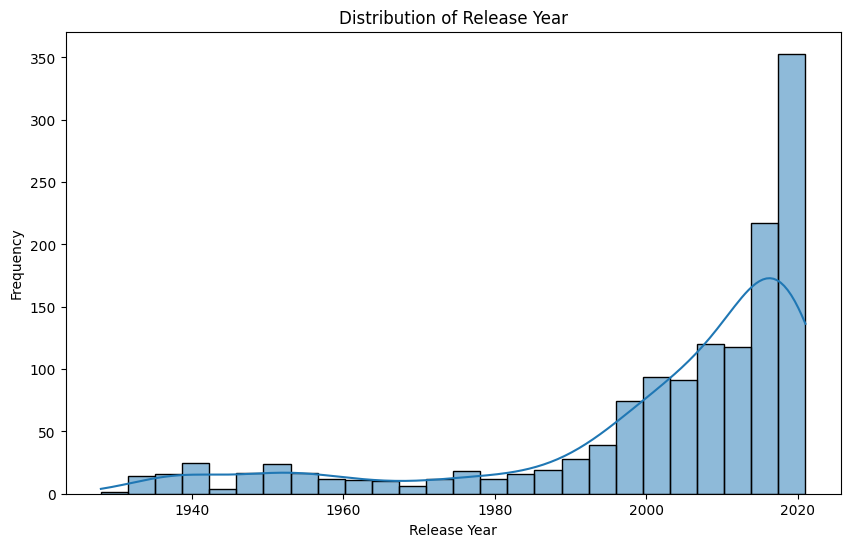

In [121]:
# 4. Visualizations

# Histogram of Release Year
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

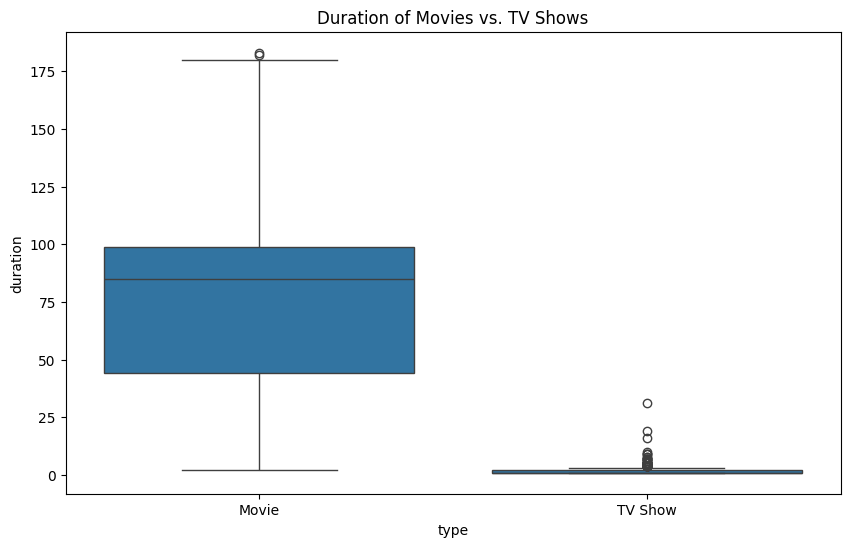

In [122]:
# Boxplot of Duration by Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration', data=df)
plt.title('Duration of Movies vs. TV Shows')
plt.show()

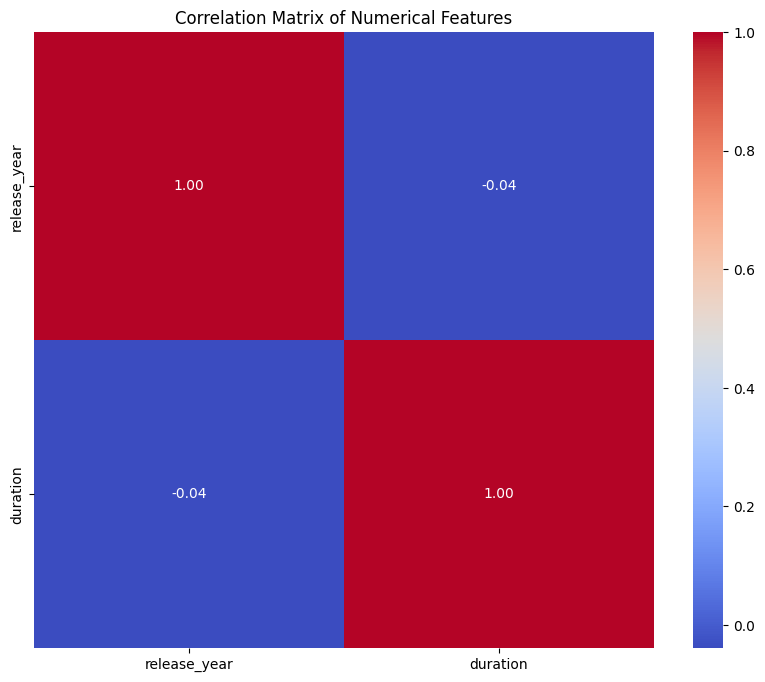

In [123]:

# Correlation Matrix Heatmap (for numerical features)
numeric_df = df.select_dtypes(include=np.number) # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


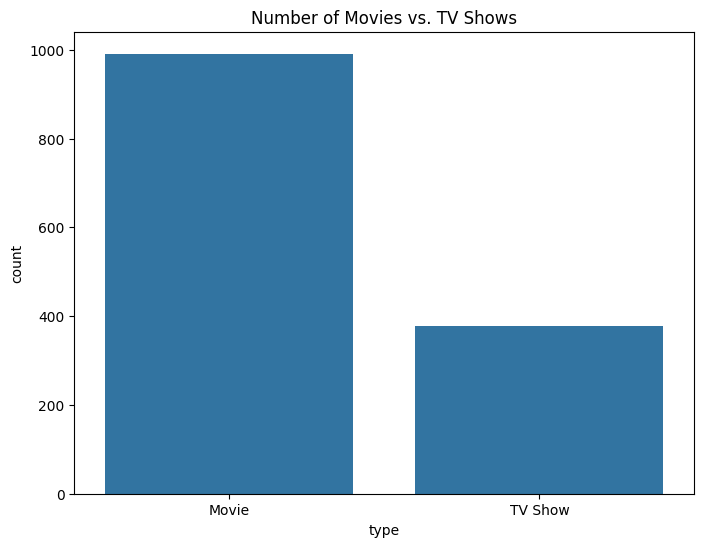

In [124]:

# Countplot of Content Type
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Number of Movies vs. TV Shows')
plt.show()

In [125]:
#Top 10 countries with most content:
top_countries = df['country'].value_counts().head(10)
print("\nTop 10 countries with the most content:\n", top_countries)



Top 10 countries with the most content:
 country
United States                    1151
United States, Canada              28
United Kingdom                     23
United States, United Kingdom      19
Canada, United States              17
United Kingdom, United States      14
United States, Australia            7
Canada                              5
United States, France               4
United States, Japan                4
Name: count, dtype: int64


In [126]:
#Average duration per content type
avg_duration_by_type = df.groupby('type')['duration'].mean()
print("\nAverage duration per content type:\n", avg_duration_by_type)


Average duration per content type:
 type
Movie      73.080727
TV Show     2.137931
Name: duration, dtype: float64


In [127]:

#Number of content added per year
content_added_per_year = df.groupby(df['date_added'].dt.year)['show_id'].count()
print("\nNumber of content added per year:\n", content_added_per_year)


Number of content added per year:
 date_added
2019.0    765
2020.0    358
2021.0    242
Name: show_id, dtype: int64


In [128]:
# data visualization

# Further visualizations using Plotly Express

# 1. Interactive Scatter Plot: Release Year vs. Duration
fig = px.scatter(df, x='release_year', y='duration', color='type', hover_data=['title'],
                 title='Release Year vs. Duration of Content')
fig.show()

In [129]:
# 2. Interactive Histogram: Distribution of Release Year
fig = px.histogram(df, x='release_year', nbins=30, color='type',
                   title='Distribution of Release Year by Content Type')
fig.show()


In [130]:
# 3. Map of Content Countries
#  (This requires 'country' column to have valid country names that plotly can geocode)
fig = px.choropleth(df, locations='country', locationmode='country names',
                    color='duration', hover_name='country',
                    title='Distribution of Content by Country (Duration)')
fig.show()


In [131]:
# 4. Treemap of Content by Rating
# Replace NaN values in the 'rating' column with a placeholder like 'Unknown'
df['rating'] = df['rating'].fillna('Unknown')

# Create the treemap with the modified dataframe
fig = px.treemap(df, path=['rating', 'type'], values='duration',
                 title='Content Distribution by Rating and Type')
fig.show()

In [132]:
# 5. Sunburst chart
fig = px.sunburst(df, path=['rating', 'type'], values='duration', color='duration')
fig.show()